In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy.stats import linregress
import seaborn as sns

# Data original

In [2]:
data_test = pd.read_csv('diamonds_test.csv')
data_train = pd.read_csv('diamonds_train.csv')
#display(data_test.head())
display(data_train.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


# Data Analysis

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
carat      40455 non-null float64
cut        40455 non-null object
color      40455 non-null object
clarity    40455 non-null object
depth      40455 non-null float64
table      40455 non-null float64
price      40455 non-null int64
x          40455 non-null float64
y          40455 non-null float64
z          40455 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [4]:
data_train.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [5]:
cuts_types = []
for i in data_train['cut']:
    if i not in cuts_types:
        cuts_types.append(i)
print(cuts_types)

#Ideal = max , Fair = min == CUT IS THE MOST IMPORTANT because it has more brilliants. 

colors_types = []
for i in data_train['color']:
    if i not in colors_types:
        colors_types.append(i)
colors_types.sort()
print(colors_types)

#D = max , J = min    .2nd most imp charact. The less color, the higher the grade. D-F = Highest Quality .  G-H = Best Value.   I-J =  Worst Value

clarity_types = []
for i in data_train['clarity']:
    if i not in clarity_types:
        clarity_types.append(i)
clarity_types.sort()
print(clarity_types)

#Refers to imperfections: I3-I2	I1	SI	VS	VVS	IF	FL   Least important (of cut and color), because they are often microscopic.
#carat: is also very important. It refers to the weight
#depth(% de la x), table(% ): la cabeza --> https://www.brilliance.com/education/diamonds/depth-table

# data_train['carat'].value_counts()
# data_train['cut'].value_counts()
# data_train['color'].value_counts()
# data_train['clarity'].value_counts()
# data_train['depth'].value_counts()
# data_train['table'].value_counts()
# data_train['x'].value_counts()
# data_train['y'].value_counts()
# data_train['z'].value_counts()


['Premium', 'Very Good', 'Fair', 'Good', 'Ideal']
['D', 'E', 'F', 'G', 'H', 'I', 'J']
['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']


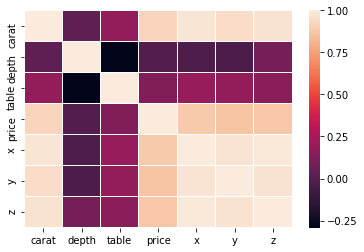

In [6]:
corr = data_train.corr()
sns.heatmap(corr, linewidths=.01);

In [7]:
# upper = corr.abs().where(np.triu(np.ones(corr.abs().shape), k=1).astype(np.bool))
# sns.heatmap(upper, linewidths=.01);

# high_corr = [col for col in upper.columns if any(upper[col] > 0.9)]

# print(high_corr)


In [8]:
# sns.set(style='darkgrid')
# a = sns.pairplot(data_train);

**Creating X and y**

In [9]:
data_train_copy = data_train.copy()
data_test_copy = data_test.copy()

In [10]:
X = data_train_copy[[x for x in data_train_copy.columns if x != 'price']]
y = data_train_copy['price']


In [11]:
# corr2 = X.corr()
# upper = corr2.abs().where(np.triu(np.ones(corr2.abs().shape), k=1).astype(np.bool))
# sns.heatmap(upper, linewidths=.01);

# high_corr = [col for col in upper.columns if any(upper[col] > 0.98)]

# print(high_corr)

# Cleaning Data

In [12]:
# X.drop('z', axis=1, inplace = True)

In [13]:
# corr2 = X.corr()
# upper = corr2.abs().where(np.triu(np.ones(corr2.abs().shape), k=1).astype(np.bool))
# sns.heatmap(upper, linewidths=.01);

# high_corr = [col for col in upper.columns if any(upper[col] > 0.97)]

# print(high_corr)

In [14]:
# X.drop('x', axis=1, inplace = True)

In [15]:
# corr2 = X.corr()
# upper = corr2.abs().where(np.triu(np.ones(corr2.abs().shape), k=1).astype(np.bool))
# sns.heatmap(upper, linewidths=.01);

# high_corr = [col for col in upper.columns if any(upper[col] > 0.98)]

# print(high_corr)

In [16]:
# X.drop('y', axis=1, inplace = True)

In [17]:
# corr2 = X.corr()
# upper = corr2.abs().where(np.triu(np.ones(corr2.abs().shape), k=1).astype(np.bool))
# sns.heatmap(upper, linewidths=.01);

# high_corr = [col for col in upper.columns if any(upper[col] > 0.90)]

# print(high_corr)

In [18]:
# data_test_copy.drop(['x','y','z'], axis=1, inplace = True)

In [19]:
#data_train.isnull().sum() No null values in the whole dataset

In [20]:
X.head(1)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25


# One Hot Ecoding

**Data to TRAIN (Dummies)**

In [21]:
dummies_cut = pd.get_dummies(X.cut)
dummies_color = pd.get_dummies(X.color)
dummies_clarity = pd.get_dummies(X.clarity)

dummies_merged = pd.concat([dummies_cut,dummies_color,dummies_clarity], axis = 'columns')


In [22]:
X_dummy_merged = pd.concat([X, dummies_merged], axis = 'columns')
X_dummy = X_dummy_merged[[x for x in X_dummy_merged.columns if x != 'cut' and x != 'color' and x != 'clarity']]
#X_dummy.dtypes

Dataframes to use when TRAINING model

In [23]:
# y
# X_dummy


**Data to TEST (Dummies)**

In [24]:
dummies_cut_test = pd.get_dummies(data_test_copy.cut)
dummies_color_test = pd.get_dummies(data_test_copy.color)
dummies_clarity_test = pd.get_dummies(data_test_copy.clarity)

dummies_merged_test = pd.concat([dummies_cut_test, dummies_color_test, dummies_clarity_test], axis = 'columns')

In [25]:
test_dummy_merged = pd.concat([data_test_copy, dummies_merged_test], axis = 'columns')
test_dummy = test_dummy_merged[[x for x in test_dummy_merged.columns if x != 'id' and x != 'cut' and x != 'color' and x != 'clarity']]
#test_dummy.dtypes


**ONE HOT Dataframes to use:**




Training: X_dummy, Y



Test: test_dummy

# Label encoding

**Data to Train (Label)**

In [26]:
X_label = data_train.copy()

In [27]:
def cut_label(col):
    if 'Ideal' in col:
        return col.replace(col, '50')
    elif 'Premium' in col:
        return col.replace(col, '40')
    elif 'Very Good' in col:
        return col.replace(col, '30')
    elif 'Good' in col:
        return col.replace(col, '20')
    elif 'Fair' in col:
        return col.replace(col, '10')
    else:
        return '0'

X_label['cut'] = X_label['cut'].apply(cut_label)
X_label['cut'].value_counts()

50    16220
40    10260
30     9095
20     3663
10     1217
Name: cut, dtype: int64

In [28]:
def color_label(col):
    if 'D' in col:
        return col.replace(col, '14')
    elif 'E' in col:
        return col.replace(col, '12')
    elif 'F' in col:
        return col.replace(col, '10')
    elif 'G' in col:
        return col.replace(col, '8')
    elif 'H' in col:
        return col.replace(col, '6')
    elif 'I' in col:
        return col.replace(col, '4')
    elif 'J' in col:
        return col.replace(col, '2')
    else:
        return 'as'

X_label['color'] = X_label['color'].apply(color_label)
X_label['color'].value_counts()

8     8455
12    7325
10    7177
6     6277
14    5049
4     4032
2     2140
Name: color, dtype: int64

In [29]:
def clarity_label(col):
    if 'I1' in col:
        return col.replace(col, '8')
    elif 'SI2' in col:
        return col.replace(col, '7')
    elif 'SI1' in col:
        return col.replace(col, '6')
    elif 'VS2' in col:
        return col.replace(col, '5')
    elif 'VS1' in col:
        return col.replace(col, '4')
    elif 'VVS2' in col:
        return col.replace(col, '3')
    elif 'VVS1' in col:
        return col.replace(col, '2')
    elif 'IF' in col:
        return col.replace(col, '1')
    else:
        return 'as'

X_label['clarity'] = X_label['clarity'].apply(clarity_label)
X_label['clarity'].value_counts()

5    13047
8    10312
4     8840
7     6929
1     1327
Name: clarity, dtype: int64

In [30]:
X_label = X_label[[x for x in X_label.columns if x != 'price' and x != 'x' and x != 'y' and x != 'z']]
#X_label.head()



**Data to Test (Label)**

In [31]:
test_label = data_test.copy()

In [32]:
test_label['cut'] = test_label['cut'].apply(cut_label)
test_label['cut'].value_counts()

50    5331
40    3531
30    2987
20    1243
10     393
Name: cut, dtype: int64

In [33]:
test_label['color'] = test_label['color'].apply(color_label)
test_label['color'].value_counts()

8     2837
12    2472
10    2365
6     2027
14    1726
4     1390
2      668
Name: color, dtype: int64

In [34]:
test_label['clarity'] = test_label['clarity'].apply(clarity_label)
test_label['clarity'].value_counts()

5    4277
8    3494
4    2986
7    2265
1     463
Name: clarity, dtype: int64

In [35]:
test_label = test_label[[x for x in test_label.columns if x != 'id' and x != 'x' and x != 'y' and x != 'z']]
test_label.head()


,carat,cut,color,clarity,depth,table
0,0.79,30,10,8,62.7,60.0
1,1.20,50,2,4,61.0,57.0
2,1.57,40,6,8,62.2,61.0
3,0.90,30,10,8,63.8,54.0
4,0.50,30,10,4,62.9,58.0


**LABEL Dataframes to use:**

Training: X_label, y

Testing: test_label

PCA

In [38]:
scaler = StandardScaler()

data_rescaled = scaler.fit_transform(X_label, y)

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA()
pca.fit(X_dummy)
pca.explained_variance_ratio_


array([4.40386560e-01, 2.39969540e-01, 1.40499077e-01, 1.92940704e-02,
       1.79823961e-02, 1.77568658e-02, 1.62642695e-02, 1.49424484e-02,
       1.40812809e-02, 1.24652216e-02, 1.18864031e-02, 1.04254649e-02,
       8.12935827e-03, 7.81963708e-03, 7.42573648e-03, 5.59330127e-03,
       4.42306945e-03, 3.09750853e-03, 2.83286295e-03, 2.48202056e-03,
       1.13111442e-03, 7.11301838e-04, 4.00490841e-04, 5.61560396e-33,
       4.47227543e-33, 2.40002060e-33])

# Splitting sample

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(pca_dummy, y, test_size = 0.3, random_state=1)


ValueError: Found input variables with inconsistent numbers of samples: [26, 40455]

In [41]:
X_train.shape, X_test.shape, X_valid.shape

((20227, 23), (10114, 23), (10114, 23))

In [41]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

# GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

Random Forest

In [39]:
params = [{'n_estimators': [1000, 1500, 2000, 4000],
           'max_depth': [None, 1, 2],
           'min_samples_split': [2, 5, 10]}]


In [40]:
gs = GridSearchCV(cv = 5, estimator = RandomForestRegressor(),
                 n_jobs=-1, param_grid = params)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
#print (gs.best_estimator_)
gs.best_estimator_

In [ ]:
#{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 1500}A
#2, 5, 10 

In [ ]:
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#                       max_features='auto', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=6,
#                       min_weight_fraction_leaf=0.0, n_estimators=1500,
#                       n_jobs=None, oob_score=False, random_state=None,
#                       verbose=0, warm_start=False)
#dummies == 548.25315

# Models



**Random Forest**

In [ ]:
# rf = RandomForestRegressor()
# # rf.set_params(**gs.best_params_)


# rf = RandomForestRegressor()
# rf.set_params(bootstrap=True, criterion='mse', max_depth=None,
#                       max_features='auto', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=10,
#                       min_weight_fraction_leaf=0.0, n_estimators=1000,
#                       n_jobs=None, oob_score=False, random_state=None,
#                       verbose=0, warm_start=False)

#best_estimator cannot be included using the **.

In [ ]:
# rf.fit(X_train, y_train)
# rf.fit(X_label, y)


In [ ]:
# y_preds = rf.predict(test_label)
# display(y_preds)



# Evaluating Score

In [ ]:
mean_squared_error(y_test, y_preds)**0.5

In [ ]:
# sklearn.metrics.mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)[source]¶



In [ ]:
# RF leaf = 749.7519457667902

# Creating  CSV

In [ ]:
model = pd.DataFrame(y_preds,columns=['price']).reset_index()
model.columns=[['id','price']]


In [ ]:
model.to_csv('model_rf_labelsplit_rfgrid.csv',index=False)

